In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv2D, Activation
from keras.preprocessing import sequence
from sklearn import metrics
import random
import numpy as np
import itertools
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# set parameters and load data
epochs = 100
batch_size = 10
time_steps = 6
features = 300

features_path = 'input_vol.npy'
labels_path = 'input_label.npy'

X = np.load(features_path)
Y = np.load(labels_path)
print(X.shape)
print(Y.shape)

(370, 6, 300)
(370, 4)


In [3]:
# randomly shuffle data
s = np.arange(X.shape[0])
np.random.shuffle(s)
X = X[s]
Y = Y[s]

In [4]:
# split data into train and test sets
train_X = X[0:296,:,:]
test_X = X[297:369,:,:]

train_Y = Y[0:296,:]
test_Y = Y[297:369,:]

In [5]:
# build LSTM layers and train model
model = Sequential()
model.add(LSTM(100, dropout= 0.2, input_shape=(time_steps, features)))
model.add(Activation('relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=epochs, batch_size=batch_size)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 404       
Total params: 160,804
Trainable params: 160,804
Non-trainable params: 0
_________________________________________________________________
None
Train on 296 samples, validate on 72 samples
Epoch 1/100
296/296 [==============================] - 4s - loss: 0.6699 - acc: 0.6841 - val_loss: 0.6205 - val_acc: 0.7014
Epoch 2/100
296/296 [==============================] - 0s - loss: 0.5766 - acc: 0.7078 - val_loss: 0.5660 - val_acc: 0.7049
Epoch 3/100
296/296 [==============================] - 0s - loss: 0.5195 - acc: 0.7542 - val_loss: 0.5

296/296 [==============================] - 1s - loss: 0.0300 - acc: 0.9899 - val_loss: 1.3217 - val_acc: 0.6944
Epoch 61/100
296/296 [==============================] - 1s - loss: 0.0221 - acc: 0.9949 - val_loss: 1.3202 - val_acc: 0.6979
Epoch 62/100
296/296 [==============================] - 0s - loss: 0.0214 - acc: 0.9924 - val_loss: 1.3117 - val_acc: 0.6979
Epoch 63/100
296/296 [==============================] - 0s - loss: 0.0259 - acc: 0.9932 - val_loss: 1.3409 - val_acc: 0.7118
Epoch 64/100
296/296 [==============================] - 0s - loss: 0.0120 - acc: 0.9975 - val_loss: 1.3224 - val_acc: 0.7083
Epoch 65/100
296/296 [==============================] - 1s - loss: 0.0099 - acc: 0.9983 - val_loss: 1.3562 - val_acc: 0.7014
Epoch 66/100
296/296 [==============================] - 1s - loss: 0.0108 - acc: 0.9992 - val_loss: 1.3454 - val_acc: 0.7049
Epoch 67/100
296/296 [==============================] - 1s - loss: 0.0152 - acc: 0.9958 - val_loss: 1.3239 - val_acc: 0.7292
Epoch 68/100


In [6]:
# score model and log accuracy
scores = model.evaluate(test_X, test_Y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 72.57%


In [ ]:
# save model
#model.save('model.h5')

In [7]:
# get predictions
y_pred = model.predict(test_X)
y_pred

array([[  6.08784631e-02,   7.00037344e-04,   4.70727507e-04,
          9.93089497e-01],
       [  1.02481656e-01,   7.57343078e-04,   3.80564743e-04,
          4.31274122e-04],
       [  7.10452301e-03,   5.75981743e-04,   9.94173944e-01,
          6.33051211e-04],
       [  1.46325689e-03,   1.10147474e-03,   9.83400166e-01,
          6.28310489e-04],
       [  9.94987369e-01,   2.76276213e-03,   5.08848694e-04,
          1.46745369e-04],
       [  6.09508774e-04,   3.35921301e-04,   4.75930312e-04,
          3.20658495e-04],
       [  5.48839569e-04,   2.86244031e-04,   8.36329767e-04,
          2.98320025e-04],
       [  1.97452307e-02,   1.01756793e-03,   5.32943271e-02,
          7.23019693e-05],
       [  5.56171057e-04,   9.96908486e-01,   1.08278135e-03,
          9.94611382e-01],
       [  9.82885480e-01,   5.04315540e-04,   3.73256952e-03,
          1.52357398e-02],
       [  1.60589423e-02,   3.83963548e-02,   7.94255137e-01,
          4.11617293e-05],
       [  9.92037296e

In [8]:
# create list of classes for input to confusion matrix
all_permutations = [[0,0,0,0],[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1],[1,1,0,0],[1,0,1,0],[1,0,0,1],[0,1,1,0],[0,1,0,1],[0,0,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,1],[0,1,1,1],[1,1,1,1]]
classes = []
for label in all_permutations:
    val = ""
    for x in label:
        val = val + str(int(x))
    classes.append(val)
    
classes

['0000',
 '1000',
 '0100',
 '0010',
 '0001',
 '1100',
 '1010',
 '1001',
 '0110',
 '0101',
 '0011',
 '1110',
 '1101',
 '1011',
 '0111',
 '1111']

In [9]:
# create y true and y predictions to input into confusion matrix
# values must be strings or ints for scikit-learn's confusion matrix, so we must transform them
yt = []
for label in test_Y:
    val = ""
    for x in label:
        val = val + str(int(x))
    yt.append(val)
    
yp = []
for label in y_pred:
    val = ""
    for x in label:
        
        val = val + str(int(0 if x < 0.8 else 1))
    yp.append(val)

print(yp)

['0001', '0000', '0010', '0010', '1000', '0000', '0000', '0000', '0101', '1000', '0000', '1101', '0000', '0101', '0000', '0000', '0001', '0000', '0000', '0000', '0100', '0000', '0000', '0000', '1010', '0001', '0000', '0100', '1010', '0011', '0100', '0011', '0000', '0000', '0011', '0000', '0000', '0000', '0010', '0010', '0111', '0000', '0000', '0001', '0000', '0000', '1010', '0001', '0111', '1000', '0000', '0111', '0100', '0000', '0011', '0000', '0001', '0101', '0000', '0000', '0000', '0110', '1011', '1010', '0000', '0001', '0001', '0000', '0101', '0010', '1001', '1000']


In [10]:
confusion = metrics.confusion_matrix(yt, yp)
confusion

array([[16,  2,  1,  0,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  1,  0,  2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  2,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  1,  0,  1,  0,  2,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0

In [11]:
# plot confusion matrix with class labels

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[16  2  1  0  1  0  0  1  0  0  1  0  0  0  0]
 [ 1  1  0  2  0  2  0  0  0  0  0  0  0  0  0]
 [ 2  0  1  0  1  1  0  0  0  0  0  0  0  0  0]
 [ 2  2  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 3  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  1  0  0  0  0  0  0  0  0  0  1  0]
 [ 1  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 3  0  0  0  1  0  1  0  2  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  0  0  0  1  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  1  0  1  0  0  0  0]]


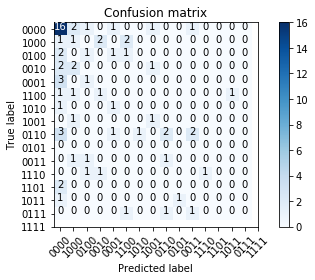

In [12]:
# compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion, classes=classes, title='Confusion matrix')

plt.show()